# Exploring Myocardial Infarction scRNA Data using PILOT: Unraveling Disease Trajectory and Cellular/Molecular Changes 

<div class="alert alert-block alert-info">
<b>PILOT</b>

Welcome to the PILOT Package Tutorial for scRNA Data!

Here we show the whole process for applying PILOT to scRNA data using Myocardial Infarction scRNA Data, you can download it from [here](https://costalab.ukaachen.de/open_data/PILOT/myocardial_infarction.h5ad).

</div>

In [1]:
import PILOT as pl

### Reading Anndata

In [2]:
adata=pl.tl.load_h5ad('Datasets/myocardial_infarction.h5ad')

### Loading the required information and computing the Wasserstein distance:
<div class="alert alert-block alert-info"> In order to work with PILOT, ensure that your Anndata object is loaded and contains the required information.
    
Use the following parameters to configure PILOT for your analysis (Setting Parameters):
    
adata: Pass your loaded Anndata object to PILOT.
    
emb_matrix: Provide the name of the variable in the obsm level that holds the PCA representation.
    
clusters_col: Specify the name of the column in the observation level of your Anndata that corresponds to cell types or clusters.
    
sample_col: Indicate the column name in the observation level of your Anndata that contains information about samples or patients.
    
status: Provide the column name that represents the status or disease (e.g., "control" or "case").
       
</div>

In [3]:
pl.tl.wasserstein_distance(adata,emb_matrix='PCA',
clusters_col='cell_subtype',sample_col='sampleID',status='Status')

ARI:  0.9
Silhouette score:  0.7392508867168279


### Ploting the Cost matrix and the Wasserstein distance:


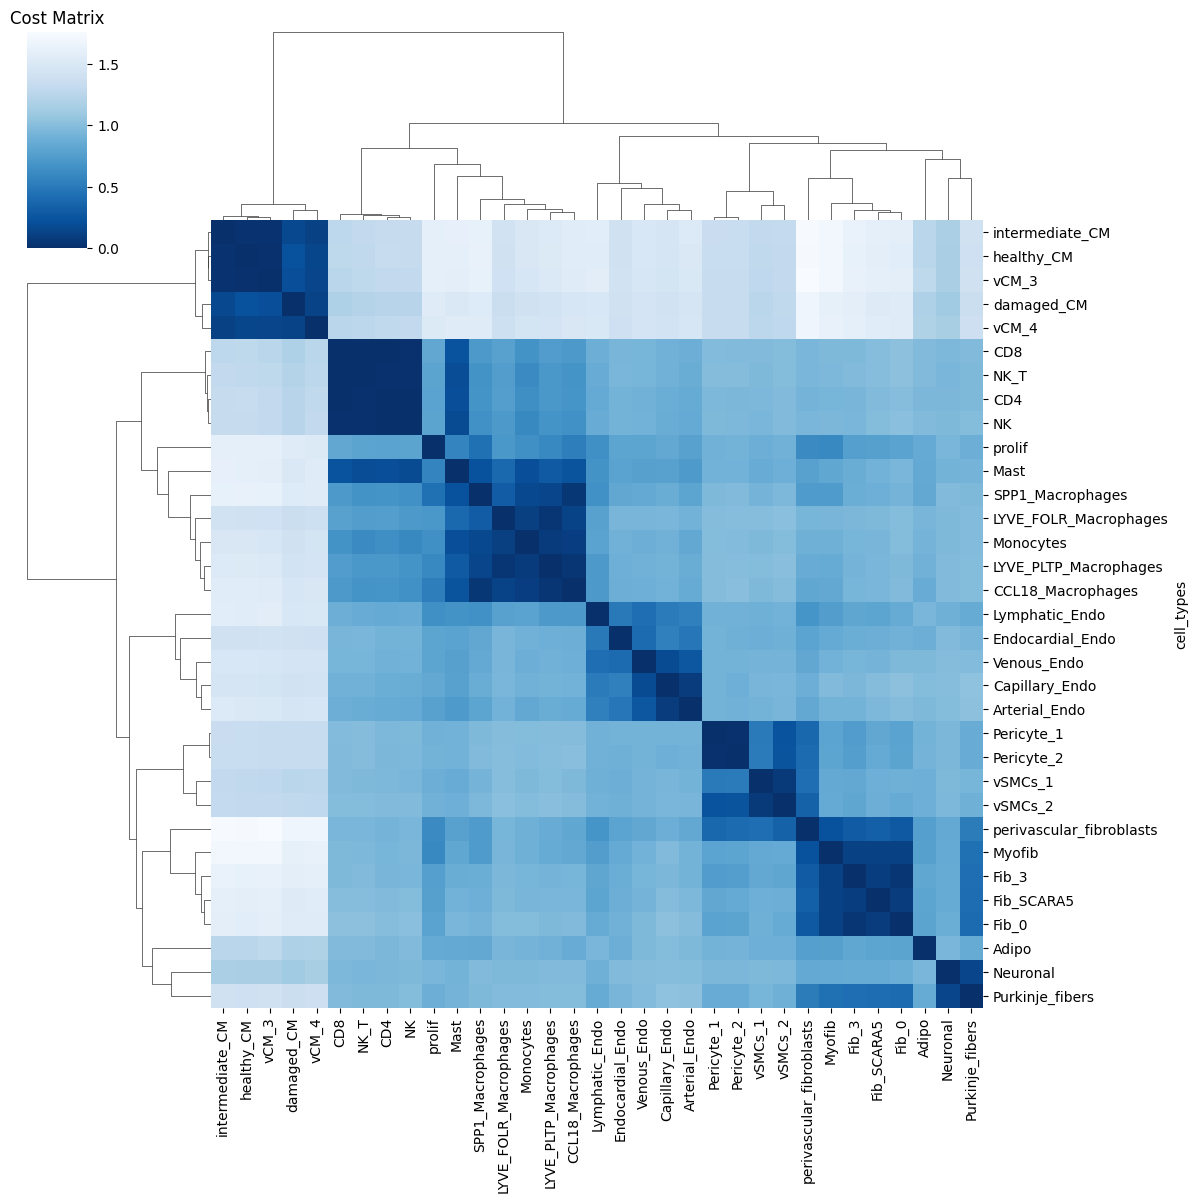

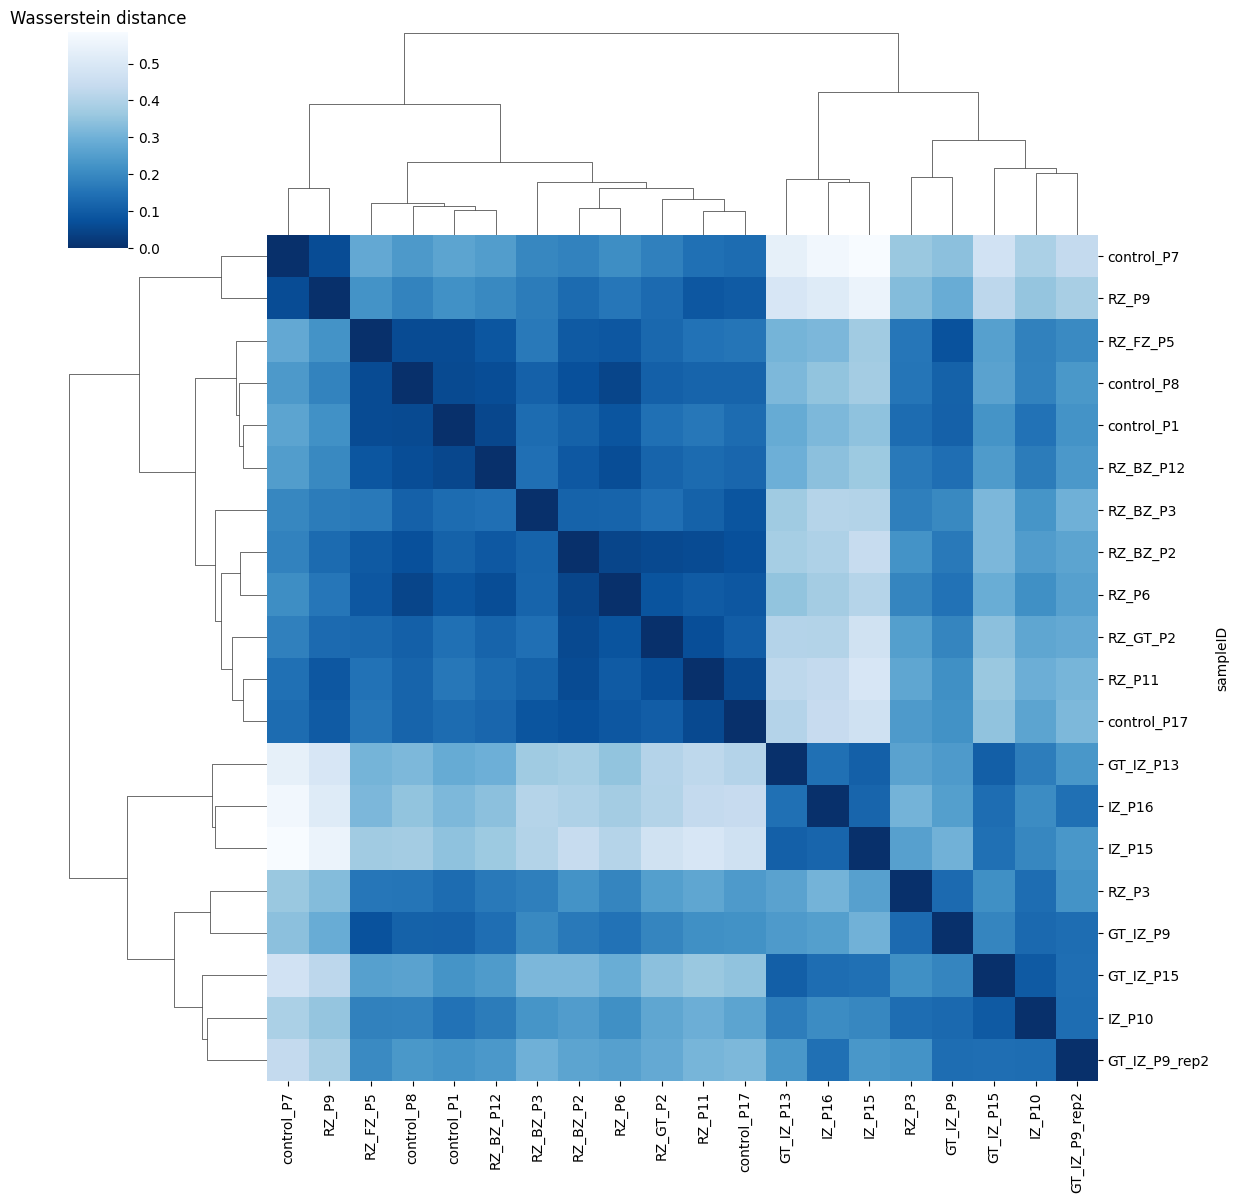

In [4]:
pl.pl.heatmaps(adata)

### Trajectory:


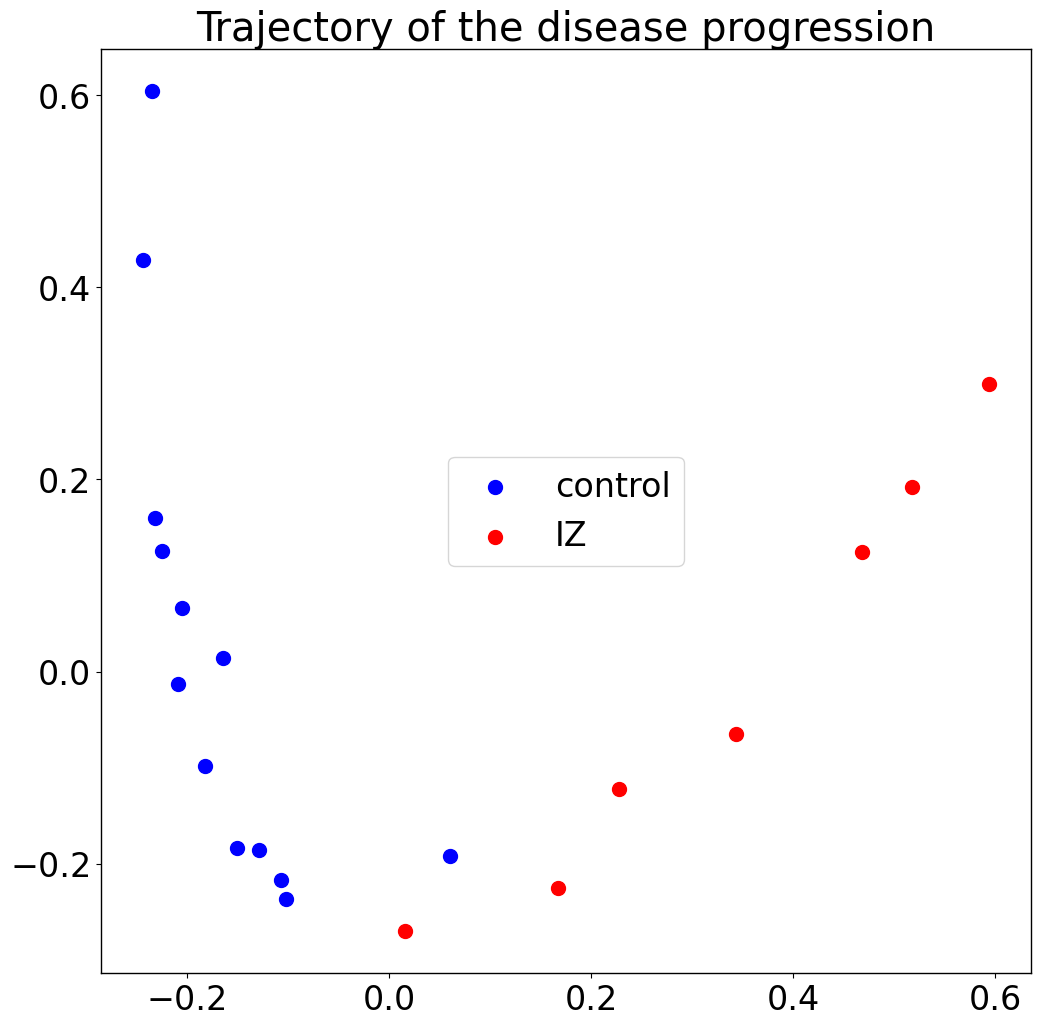

In [5]:
pl.pl.trajectory(adata,colors=['Blue','red'])

###  Fit a principal graph:
<div class="alert alert-block alert-info"> 
Drawing the backbone of the trajectory with EIPLGraph.
Here the source_node is important to start ranking samples, simply you can choose the start point from control samples.  It also allows
us to rank samples with a disease progression score t = t1, ...,tn, where tl is the ranking of the sample n
</div>


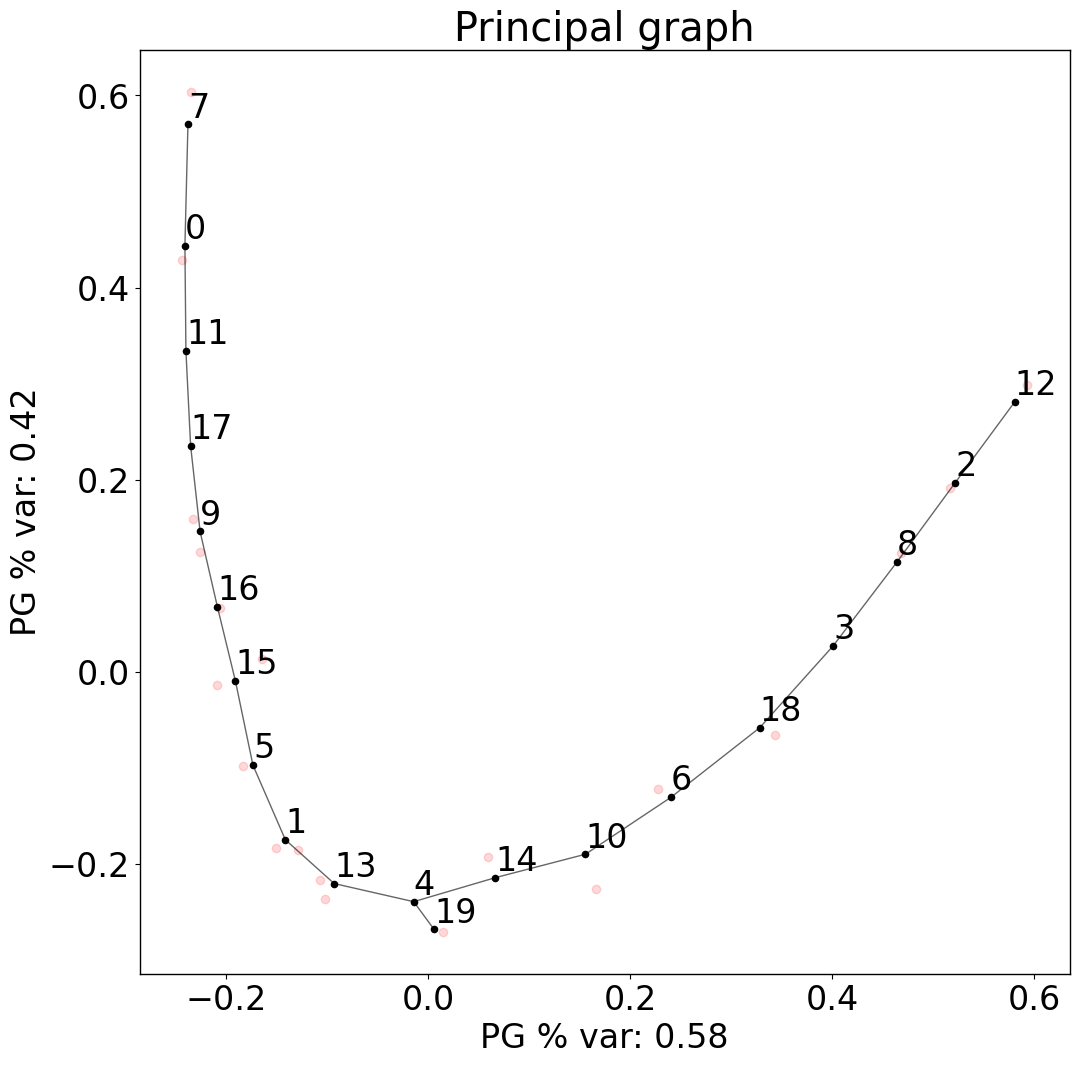

In [6]:
pl.pl.fit_pricipla_graph(adata,source_node=7)

###  Cell-type importance:
<div class="alert alert-block alert-info"> 
Here we get the critical cells that are changing over the disease progression(sorted samples based on the trajectory of PILOT with EIPLGraph).
</div>

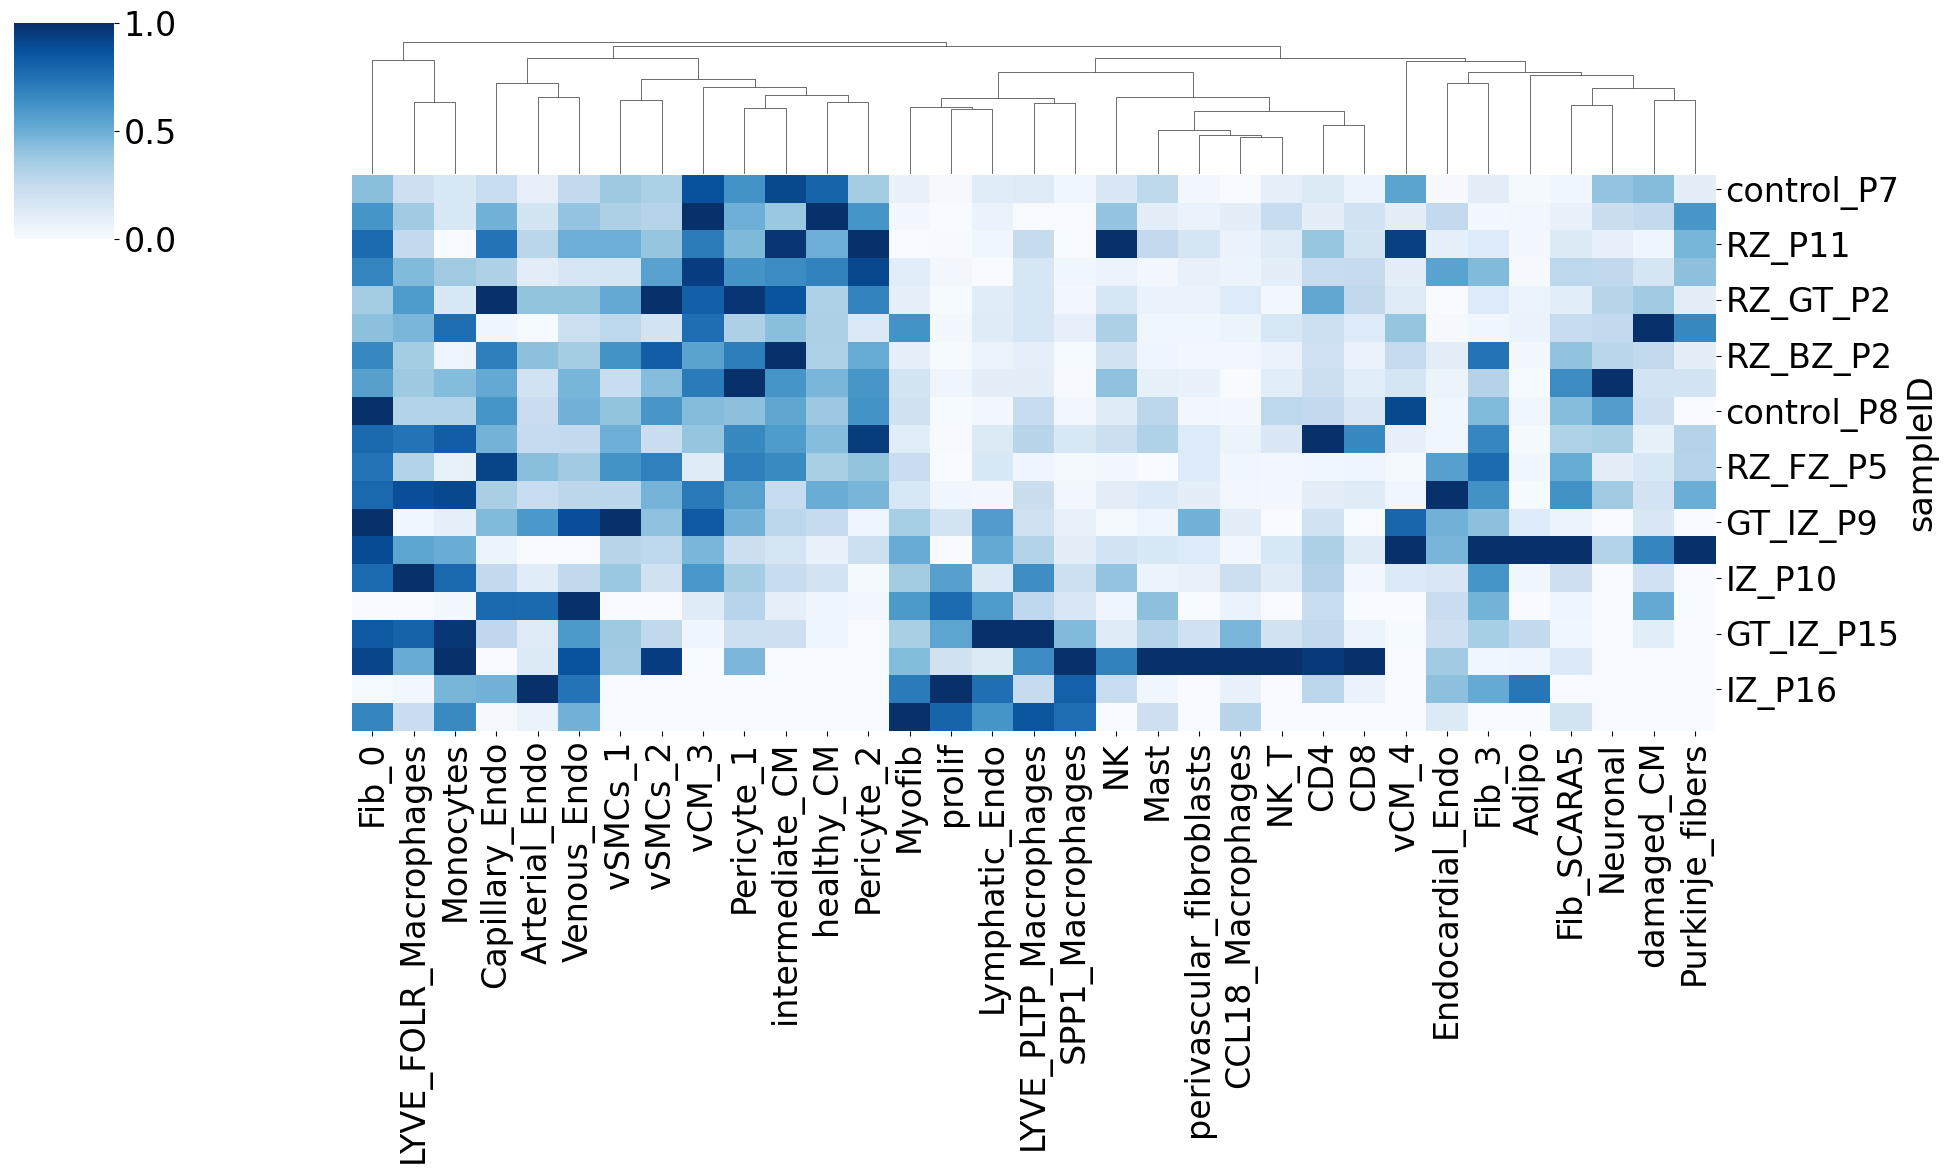

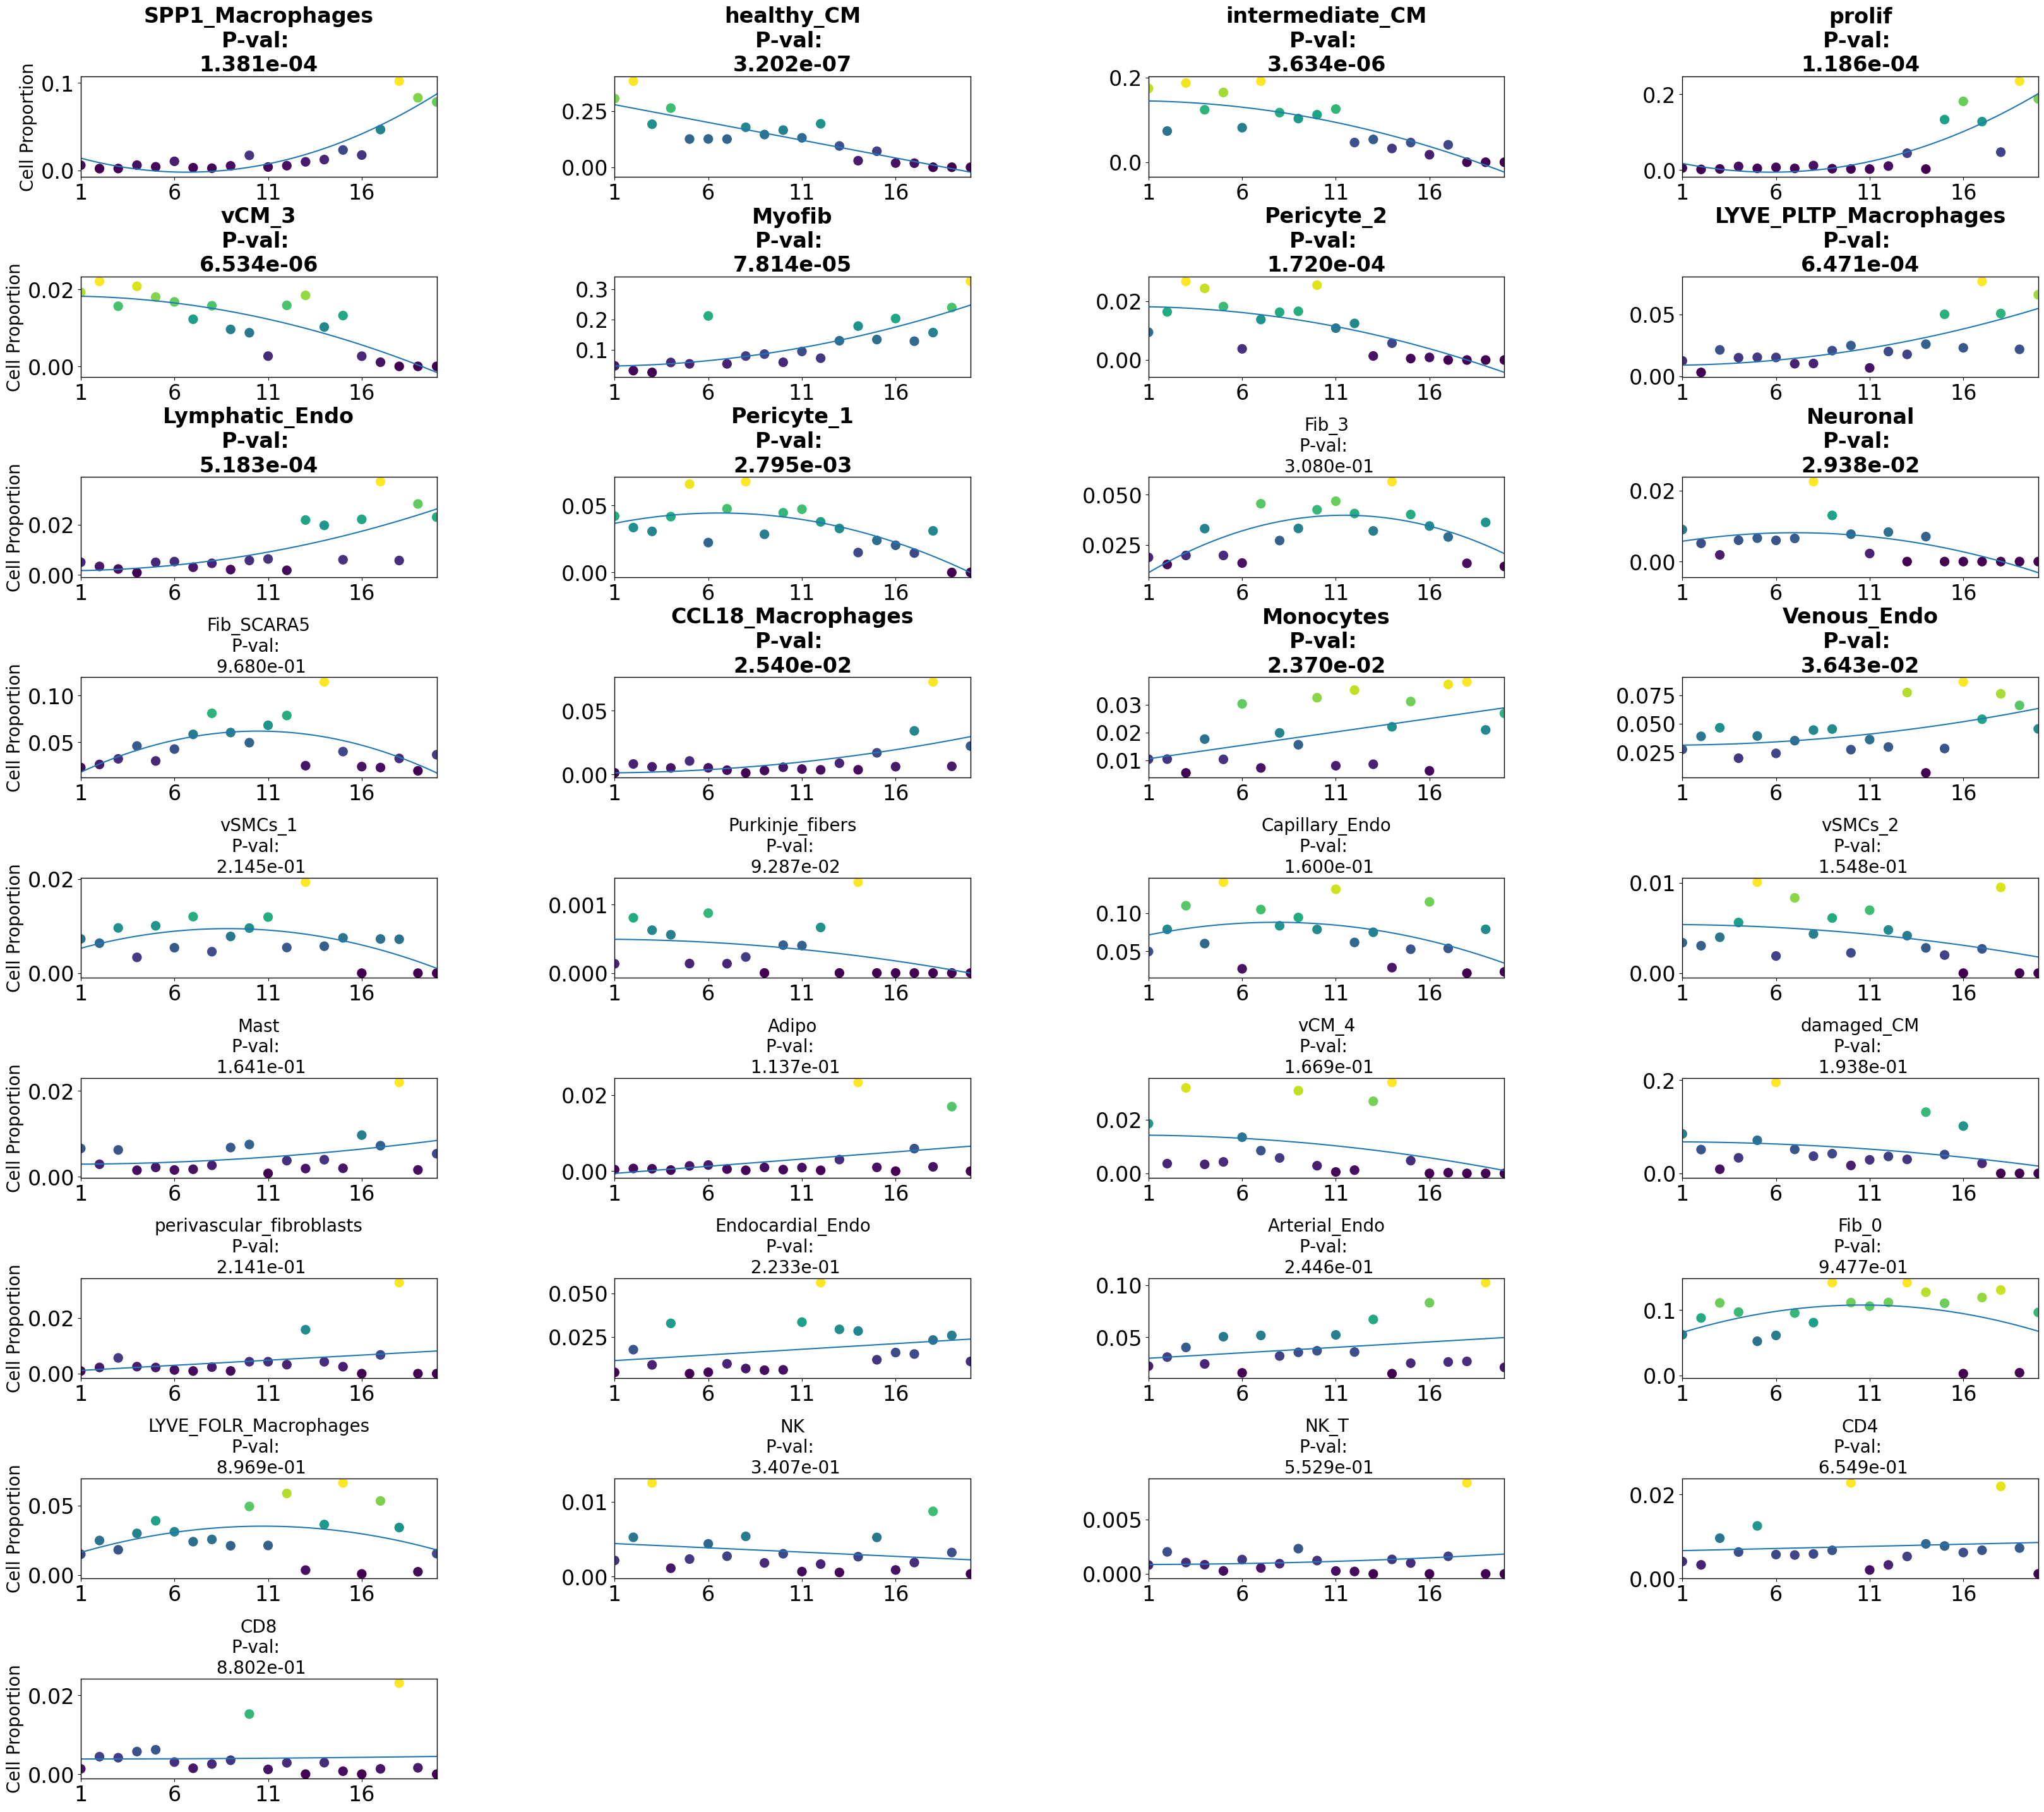

In [7]:
pl.tl.cell_importance(adata)

# Applyin PILOT for finding Markers

### Extract gene expressions from Original object :
<div class="alert alert-block alert-info"> 
This step extracts genes associated with each cell_type (your insterested cells) and map them with the obtained time by PILOT (based on the Trjaectory order of Samples).
    

    
* You need to use the orinigal obejct (h5ad) to extract genes of each cell-type, we provide the "extract_cells_from_gene_expression" function that you just need to set names of columns that show cell_types/clusters and Samples/Patinets in your object.
    
* The function "extract_cells_from_gene_expression"  automatically creates a cells folder and put the extracted genes_expression associate with each cell and  obtained time by PILOT(orders).
</div>

In [8]:
pl.tl.extract_cells_from_gene_expression(adata,sample_col='sampleID',col_cell='cell_subtype')

### Gene selection:
<div class="alert alert-block alert-info"> 
In this step, we find genes that are changed specifically over the disease progression (order of Trajectory from Control to IZ) per specific cell. In other words, we uncover genes with different patterns.You need to reproduce whole markers for cells by running the following code. After running the code, you can  see a folder named 'Markers' that for each cell there is a folder inside that includes 'Whole_expressions.csv'. 
Whole_expressions file covers the found genes and their statistics.    
Please be patient for this part, it takes time for whole cells. Here we find the genes for 'SPP1_Macrophages' cell type.
</div>

Name of Cell type : SPP1_Macrophages
sparsity:0.8410225813474638
For this cell_type, p-value of  344 genes are statistically significant.
         Expression pattern  count
4            quadratic down     98
1  linear down quadratic up     94
0               linear down     84
5              quadratic up     45
2                 linear up     15
3  linear up quadratic down      8
data saved successfully


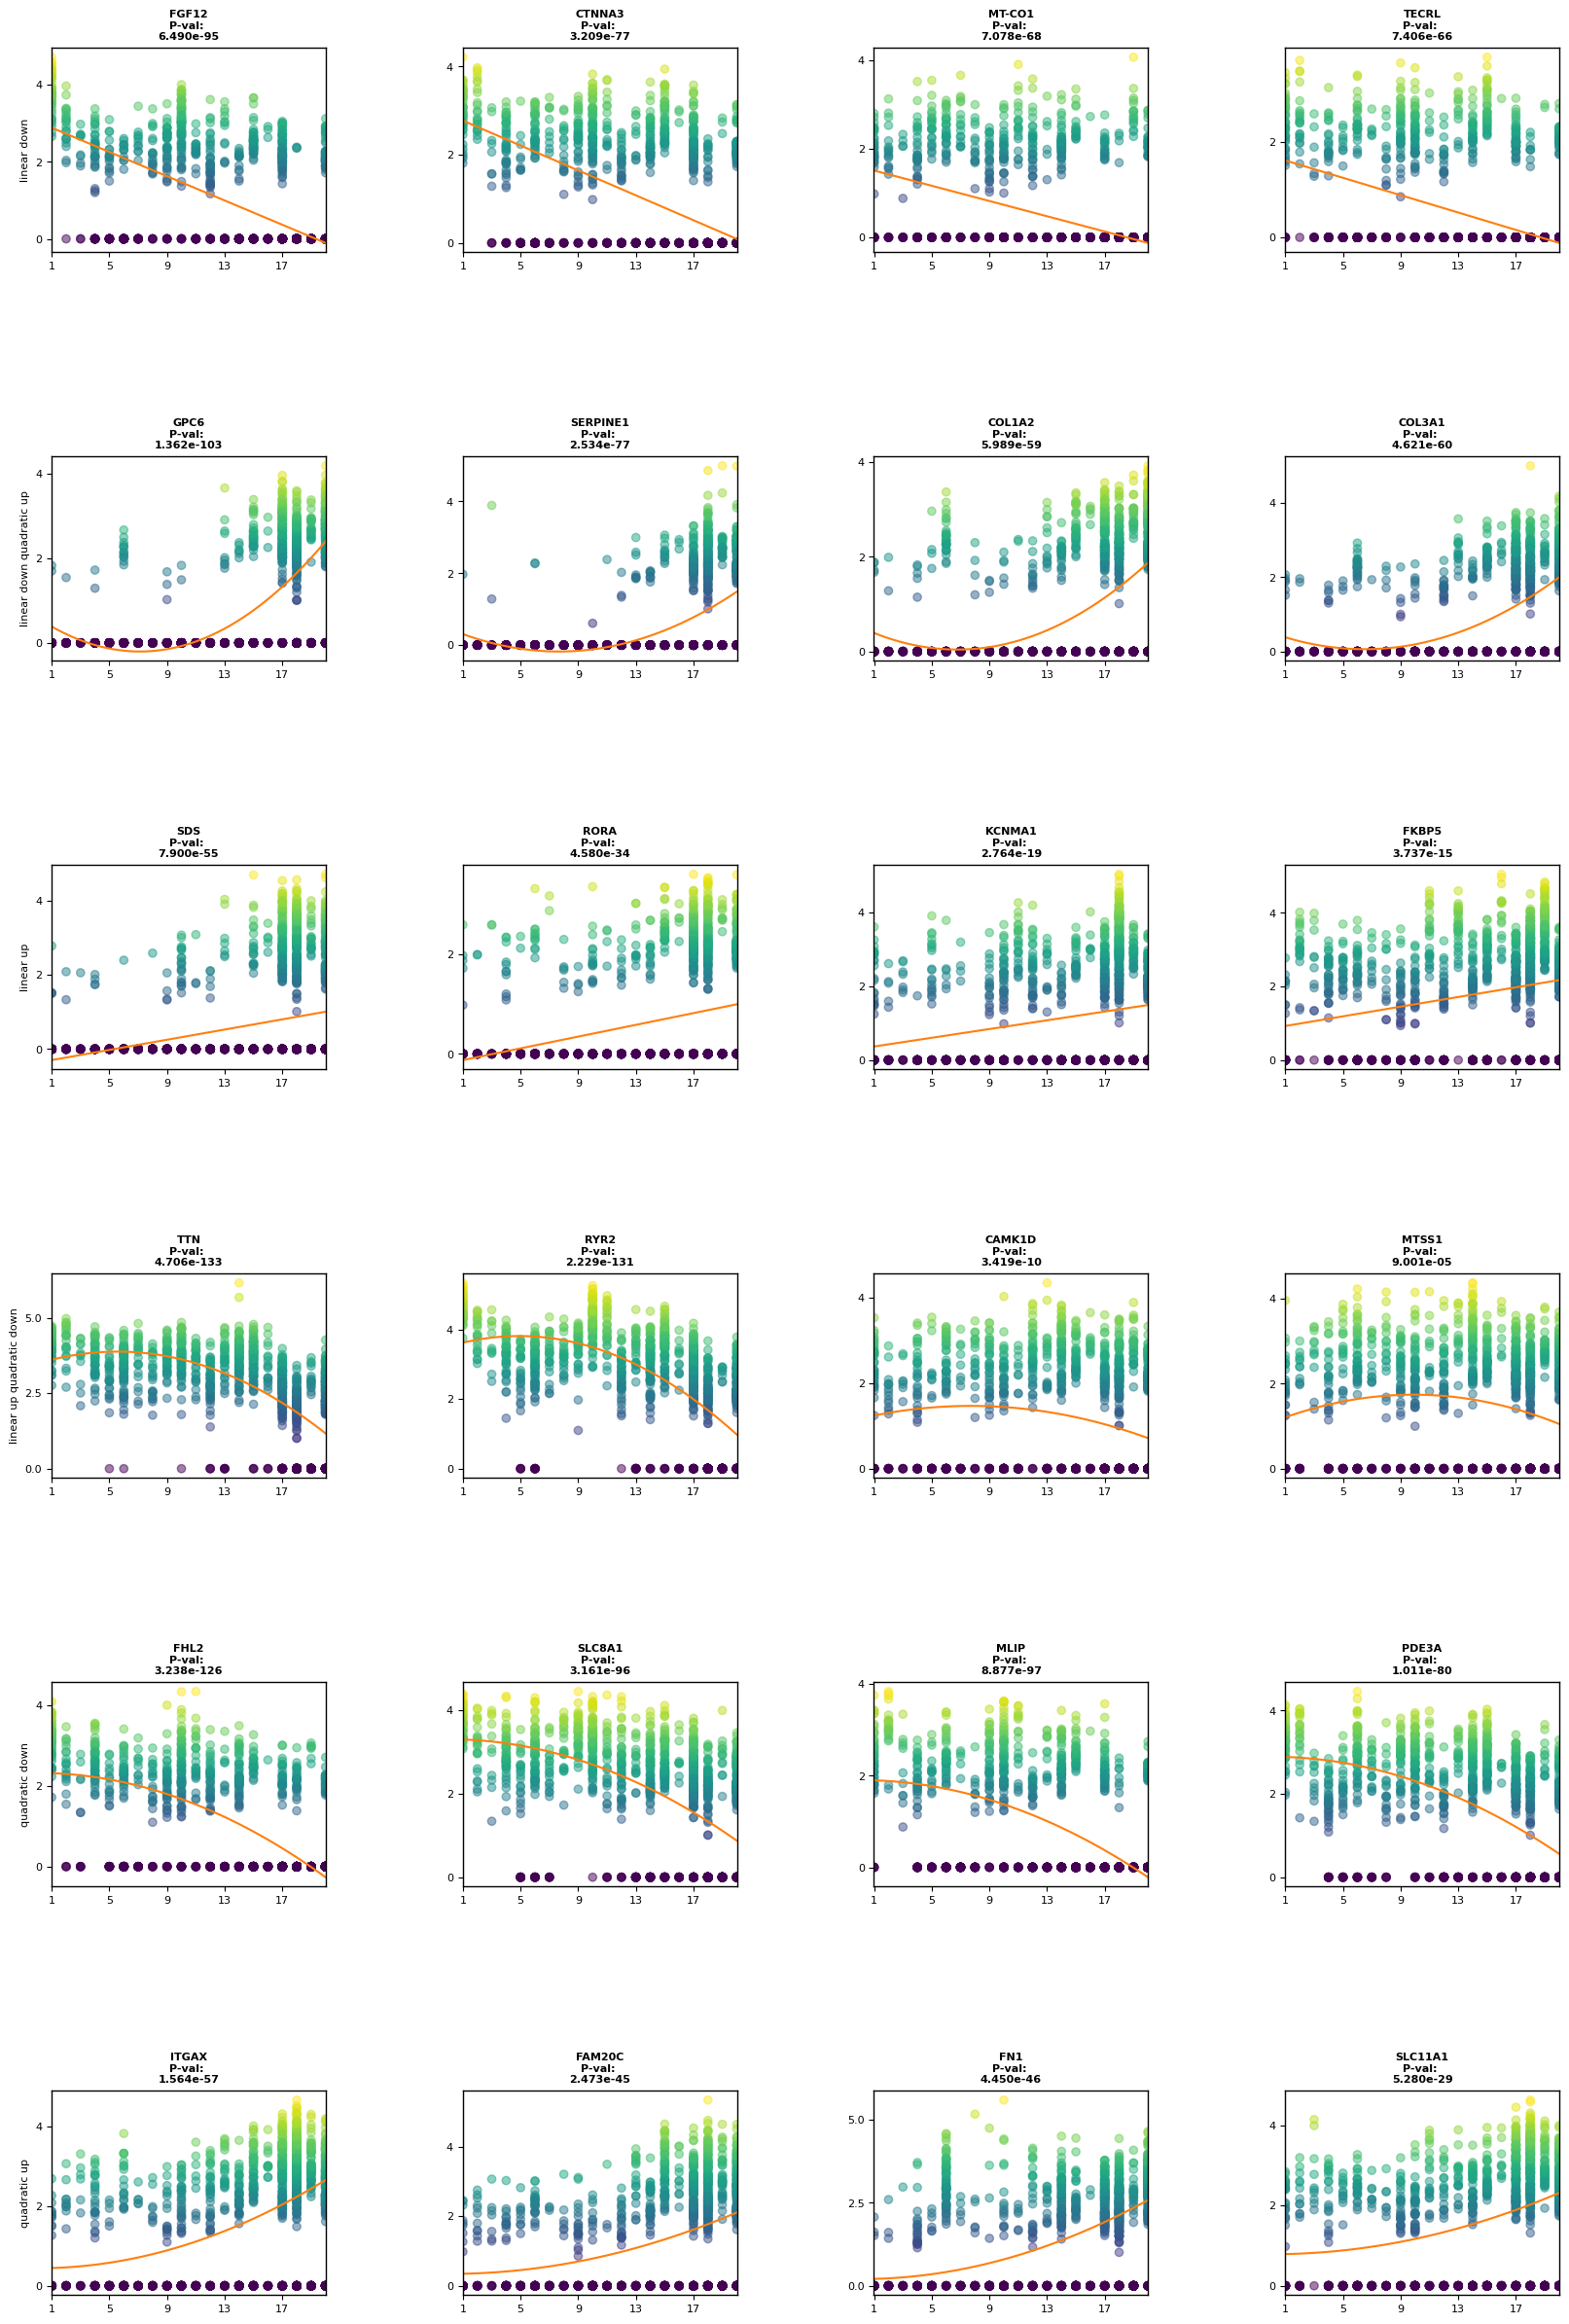

In [9]:
pl.tl.genes_importance(name_cell=adata.uns['cellnames'][0])

### Gene Cluster Differentiation:
<div class="alert alert-block alert-info"> 
After finding genes per cell, in the next step, we use the Gene_Cluster_Differentiation function to uncover the pattern of the found genes for each cell compared to other cells. You need to set your interested cells, e.g., we use 'SPP1_Macrophages' in the following part. In other hands, we  want to see the found genes of just this cell. You can adjust it with your interest or select whole cells.

Next, PILOT picks the genes of selected cell and then finds the pattern of each gene in a distinct cell compared to other cells. 
 
number_genes is the interest number of genes for each pattern.   
 
</div>

FGF12
['FGF12', 'vCM_4', 0.3918554312801232, 3, 0.941919785654118, 0.8131604209594117]
['FGF12', 'healthy_CM', 6.452065309489171, 3, 0.09157222014257593, 1.2734444918139087]
['FGF12', 'Fib_3', 0.006282361181174051, 3, 0.9998678142052037, -0.3573174002480367]
['FGF12', 'Neuronal', 1.4860478686689242e-06, 3, 0.9999999995181988, -0.06512663174863875]
['FGF12', 'CCL18_Macrophages', 0.1849789044301903, 3, 0.979976996035135, -0.4684207195670754]
['FGF12', 'SPP1_Macrophages', 0.4971265022313114, 3, 0.9195222515699082, -0.30984579540847673]
['FGF12', 'damaged_CM', 14.31730136782813, 3, 0.002503574884480104, 0.5779883981919118]
['FGF12', 'Arterial_Endo', 0.0002387227242558056, 3, 0.9999990190918407, -0.05342904490967848]
['FGF12', 'CD4', 0.04964715865327006, 3, 0.9971013142162435, -0.08610657930519161]
['FGF12', 'Fib_0', 2.1054938203543426e-08, 3, 0.9999999999991874, -0.3016169705474279]
['FGF12', 'Mast', 0.004648444900114402, 3, 0.9999158266173853, -0.10100099069305413]
['FGF12', 'perivascular

['TTN', 'vSMCs_2', 0.9592381073242627, 3, 0.8111137475832089, -0.23788558159839623]
['TTN', 'Lymphatic_Endo', 0.009007133097346793, 3, 0.9997732614031016, -0.05382082009864897]
['TTN', 'vSMCs_1', 1.1841966730082896, 3, 0.7567970441083859, -0.13867229577868545]
['TTN', 'Capillary_Endo', 0.01135957494954132, 3, 0.9996790906366145, -0.08755184320909049]
['TTN', 'LYVE_PLTP_Macrophages', 0.0, 3, 1.0, -0.05655459170947097]
['TTN', 'NK_T', 0.0, 3, 1.0, 0.039944247681592104]
['TTN', 'Endocardial_Endo', 3.2706861090216415, 3, 0.3517434757860998, -0.17488701284911756]
['TTN', 'prolif', 1.4998484191822925, 3, 0.6823053155526477, -0.205406933140029]
['TTN', 'Pericyte_1', 0.0015864895923439395, 3, 0.9999832015985398, -0.12229413814054468]
['TTN', 'Venous_Endo', 2.285068823403089, 3, 0.5153873574612189, -0.2165070099278723]
['TTN', 'CD8', 0.7349799933998693, 3, 0.8649470668188433, -0.037261807534834324]
['TTN', 'Pericyte_2', 0.5630443316909792, 3, 0.9048379009967272, 0.0682702477316568]
['TTN', 'Mon

<Figure size 640x480 with 0 Axes>

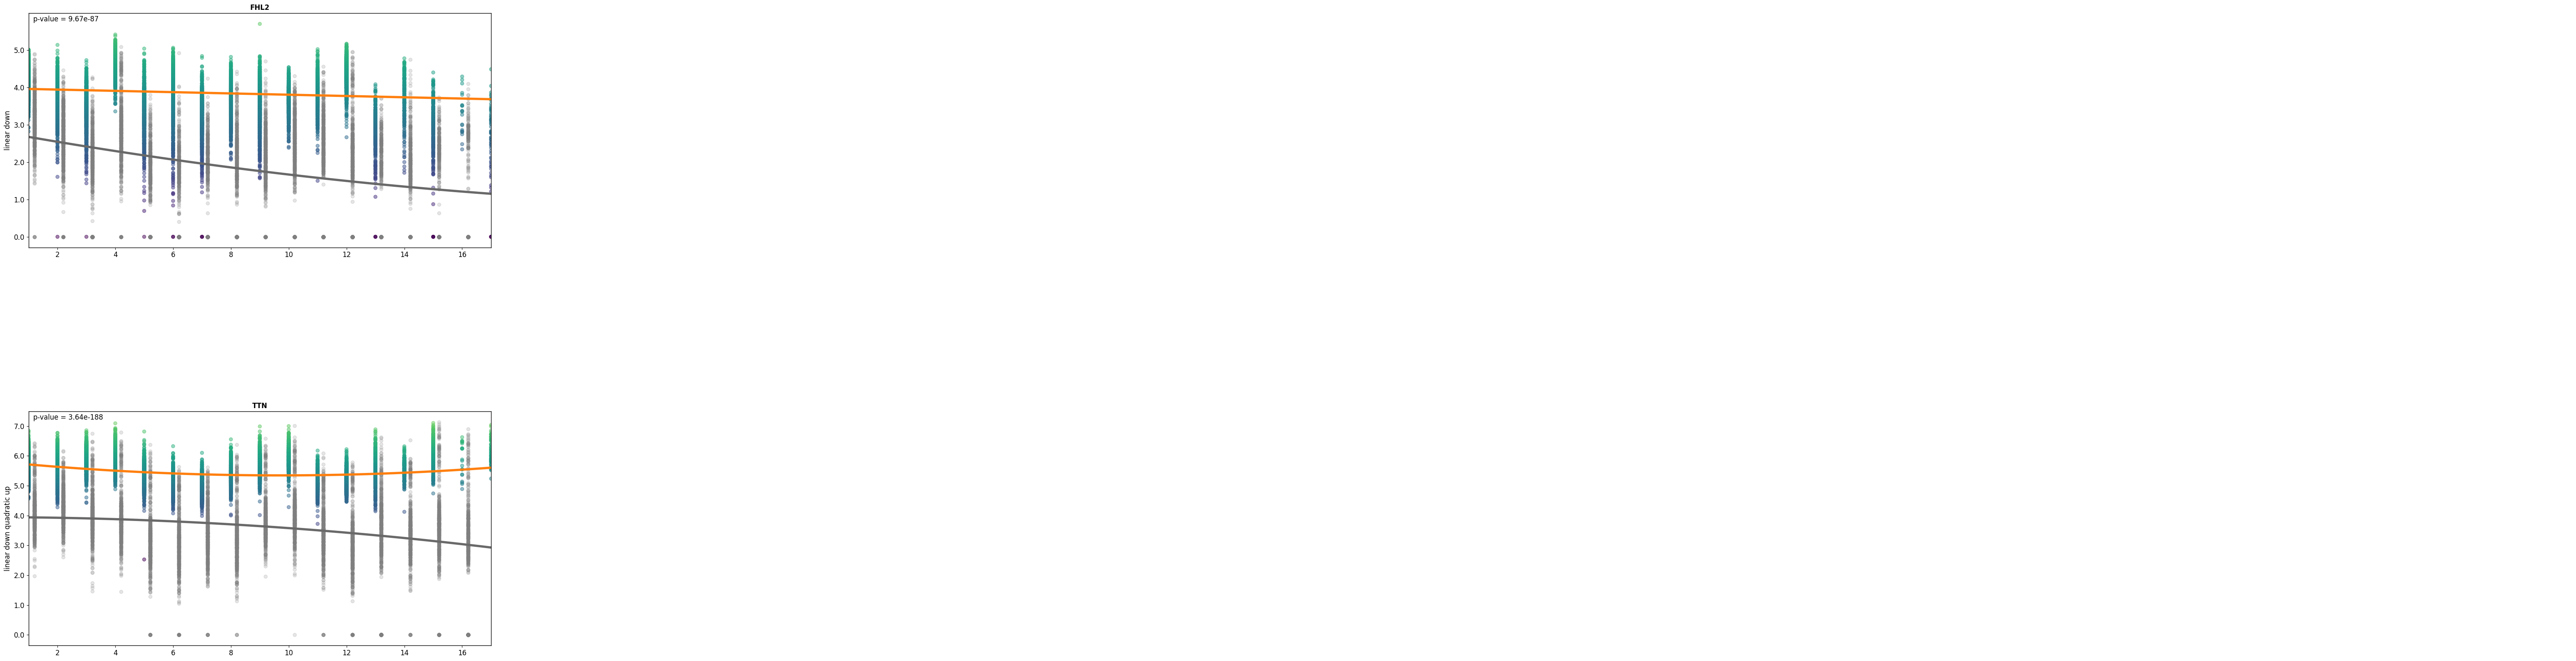

<Figure size 640x480 with 0 Axes>

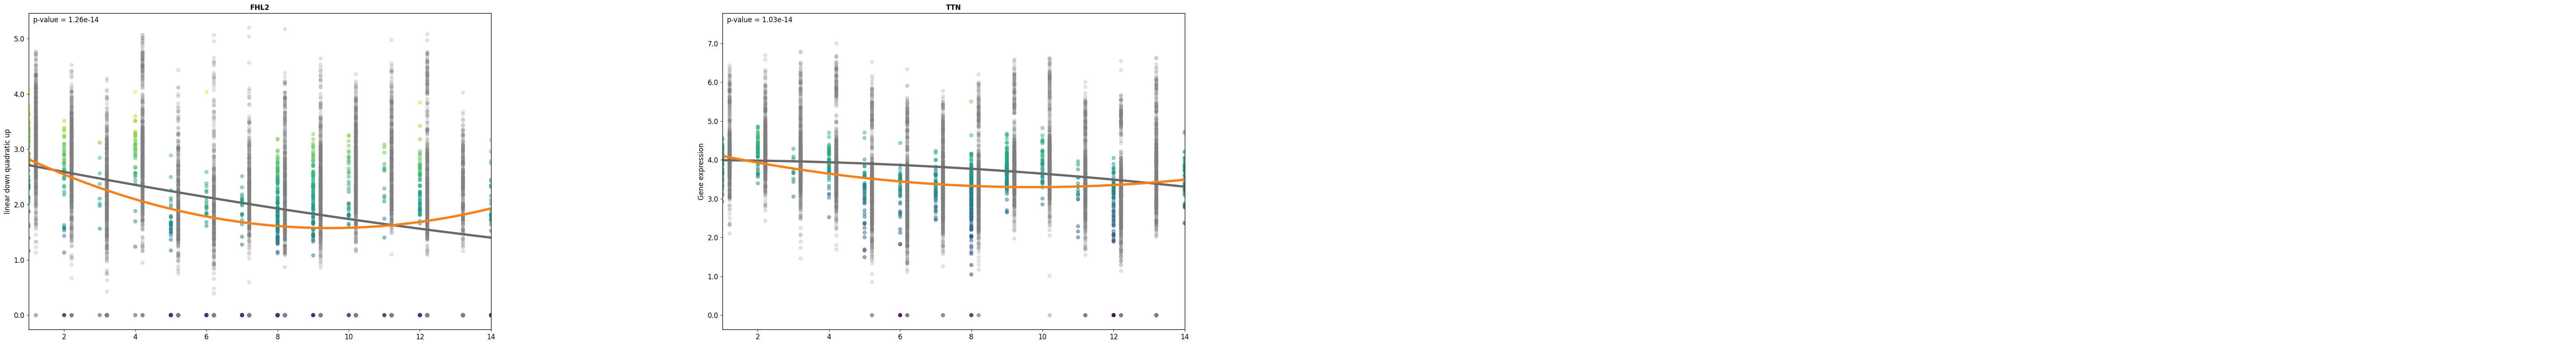

<Figure size 640x480 with 0 Axes>

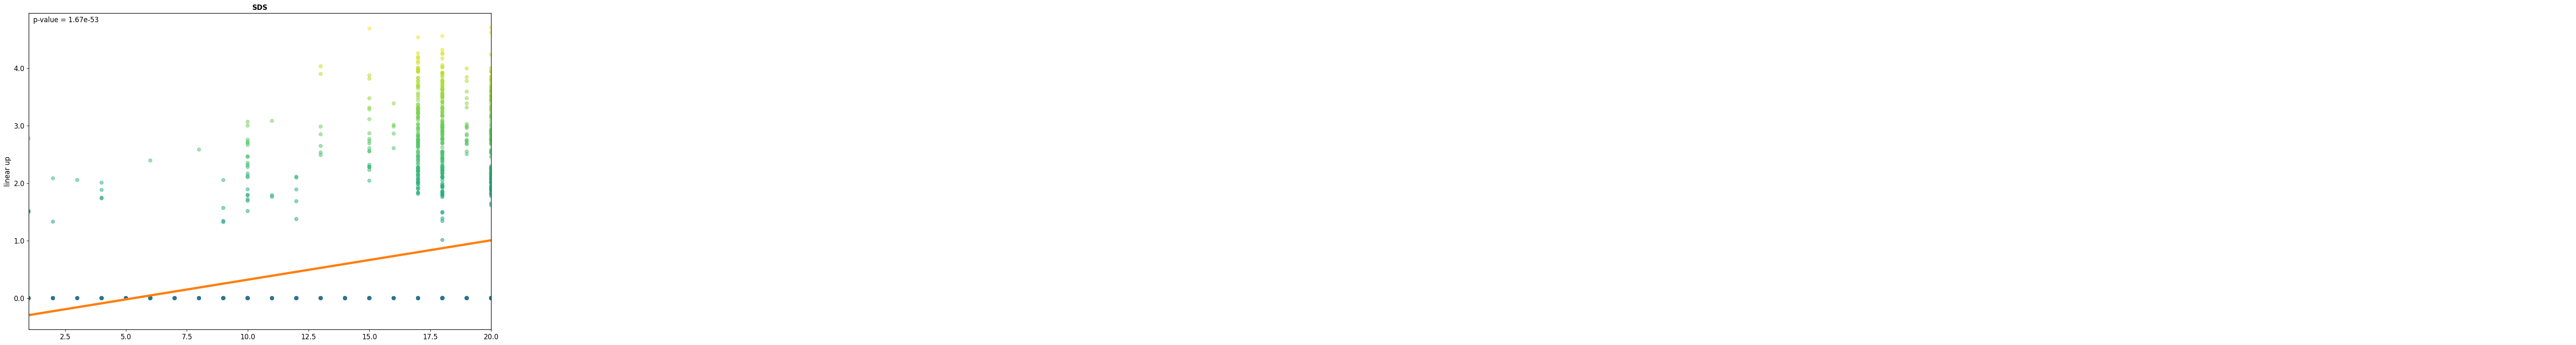

<Figure size 640x480 with 0 Axes>

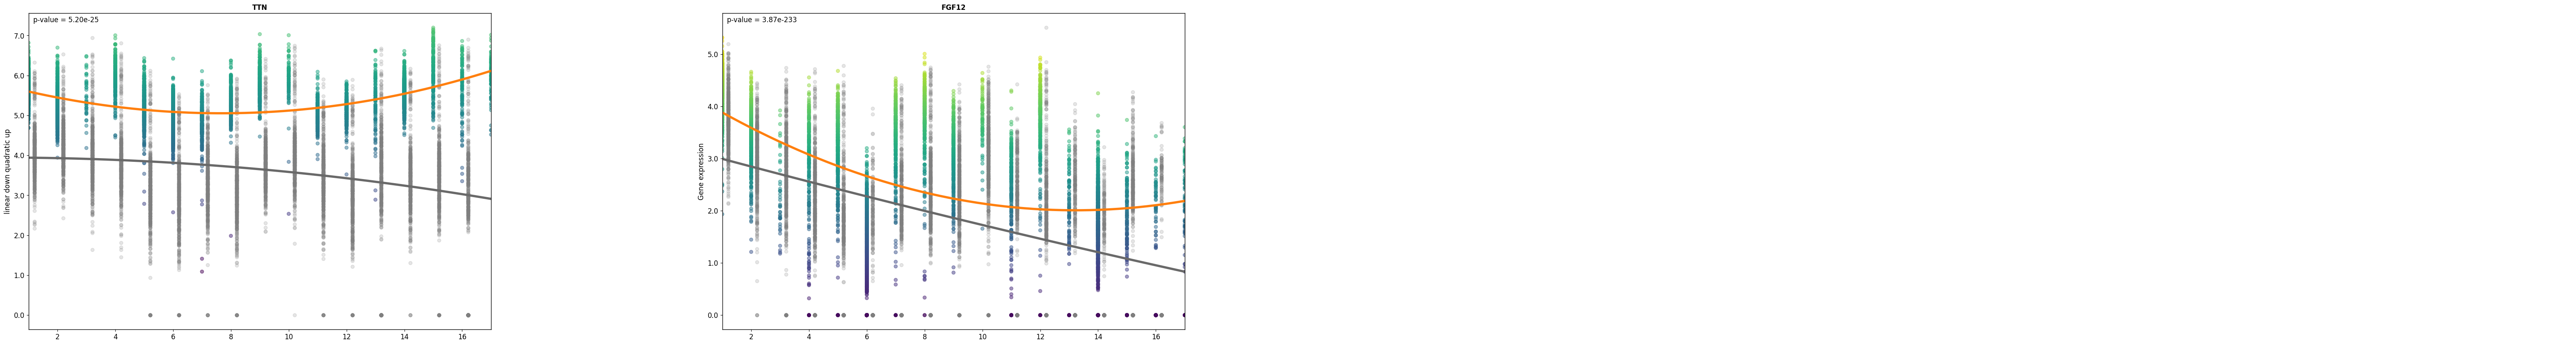

<Figure size 640x480 with 0 Axes>

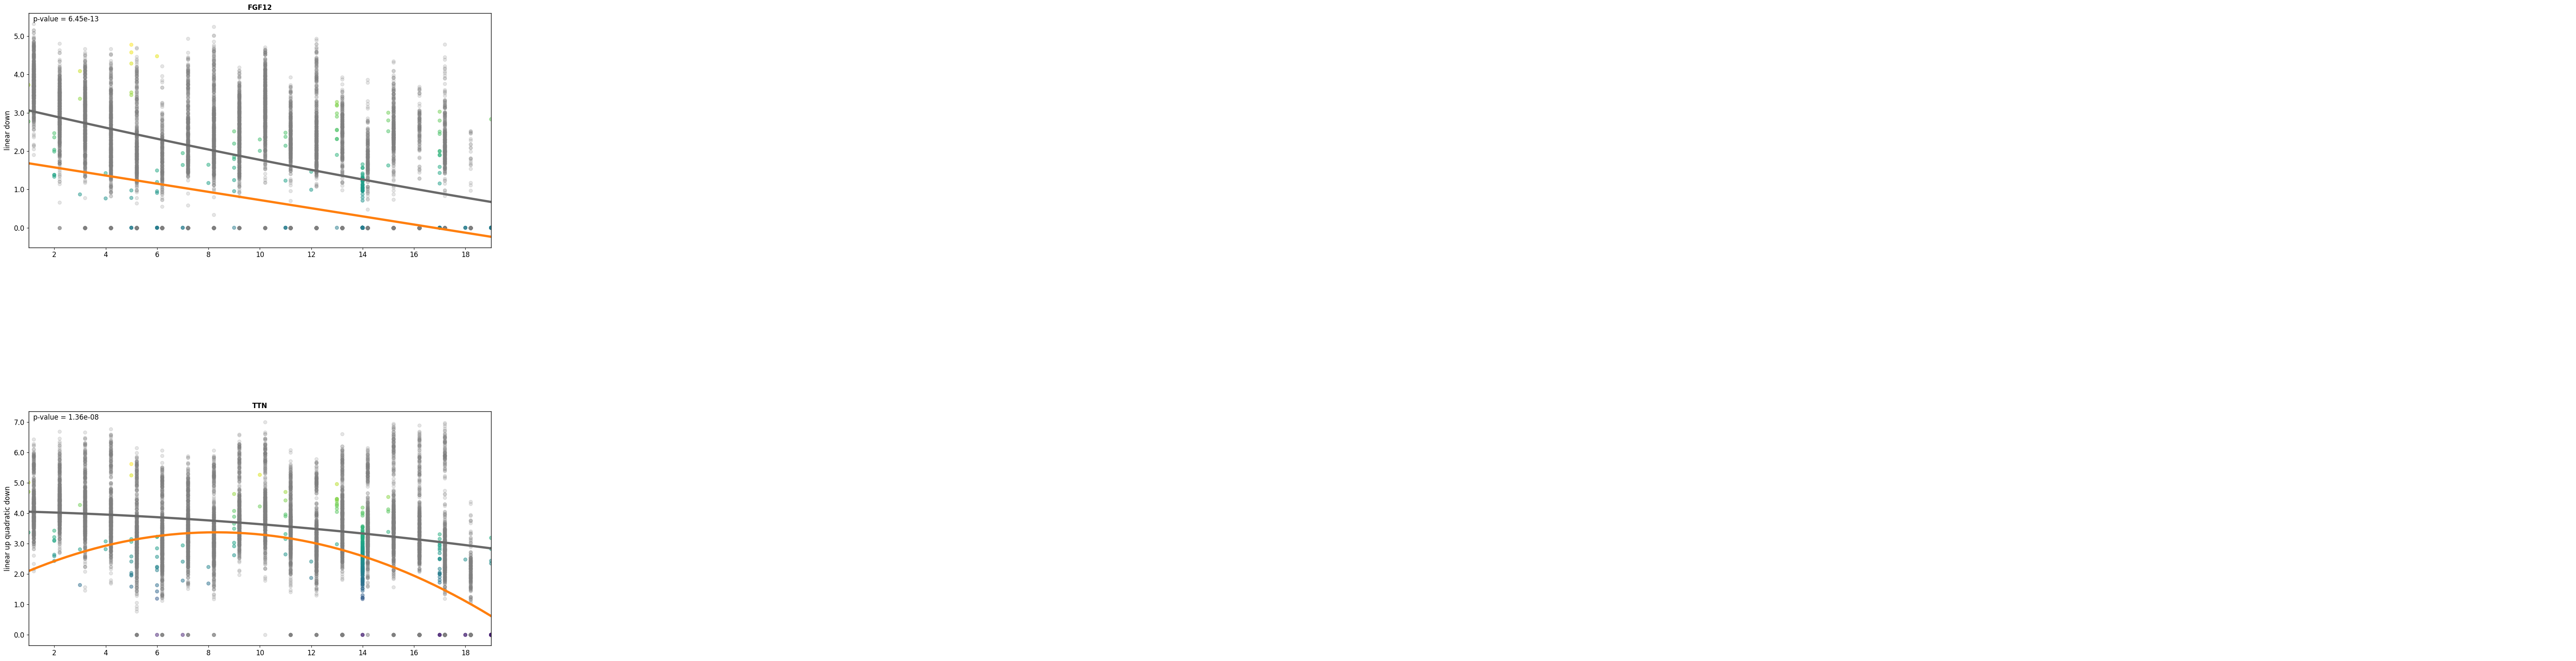

<Figure size 640x480 with 0 Axes>

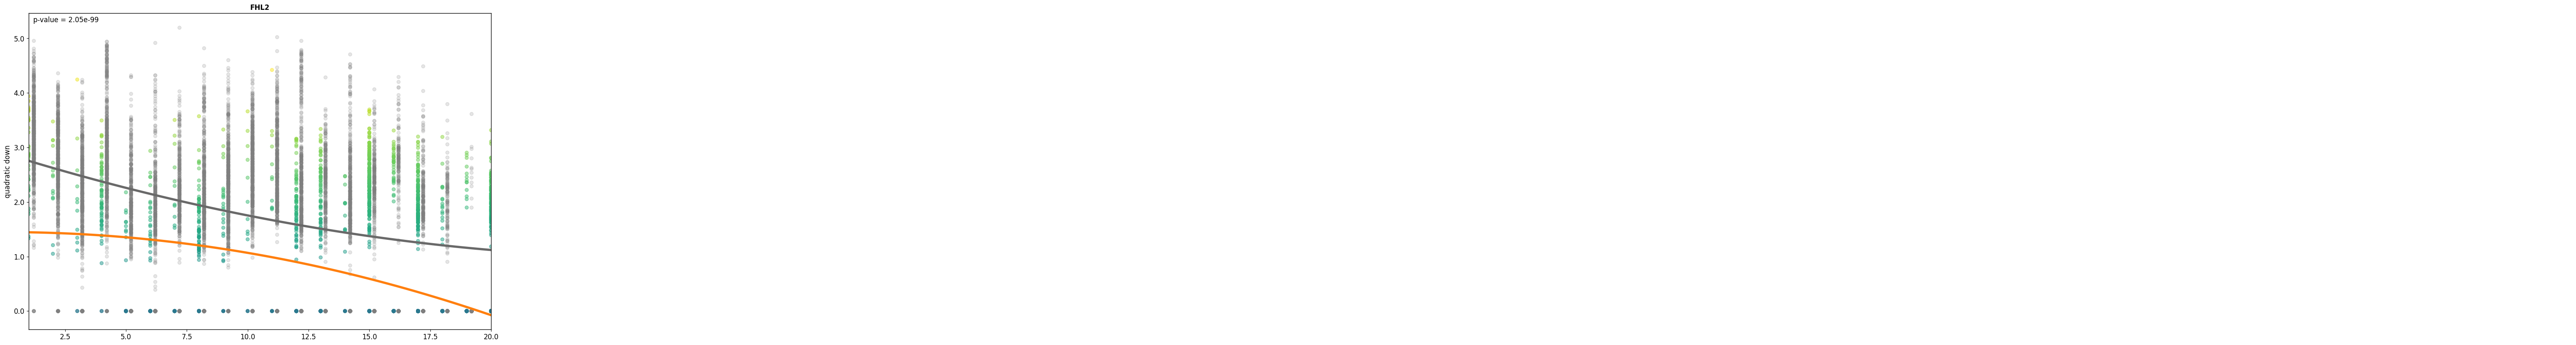

<Figure size 640x480 with 0 Axes>

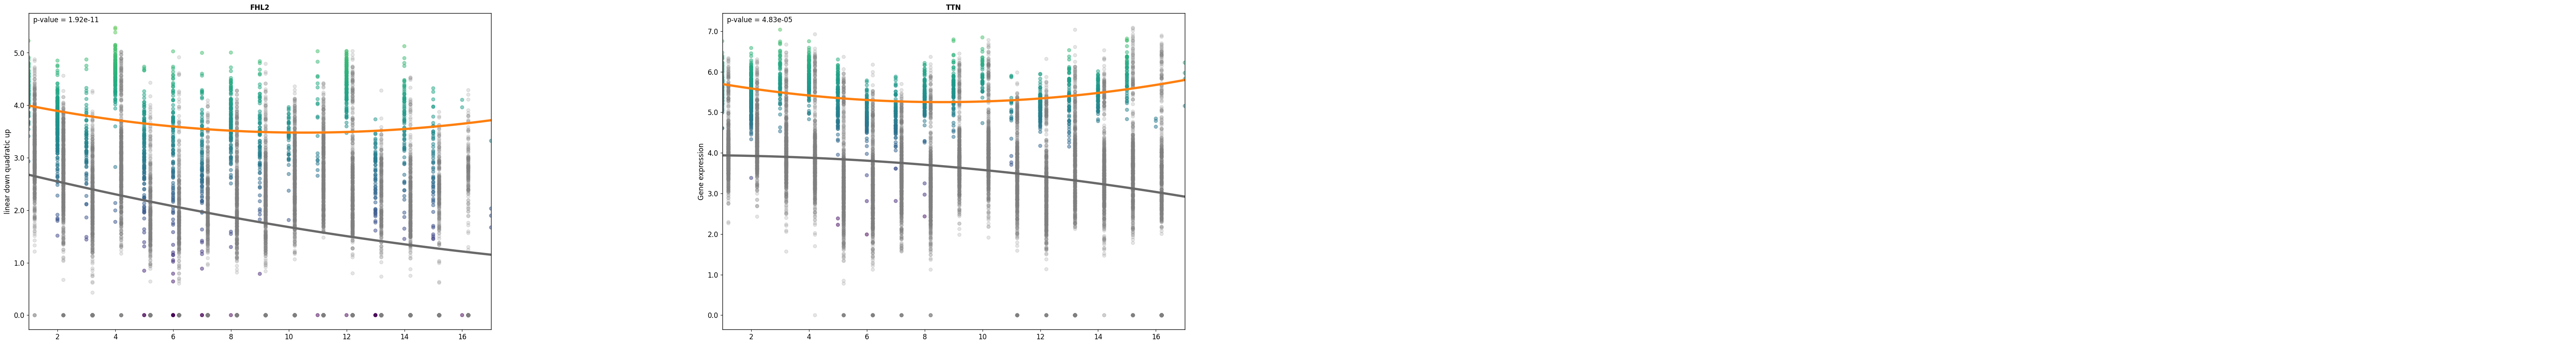

<Figure size 640x480 with 0 Axes>

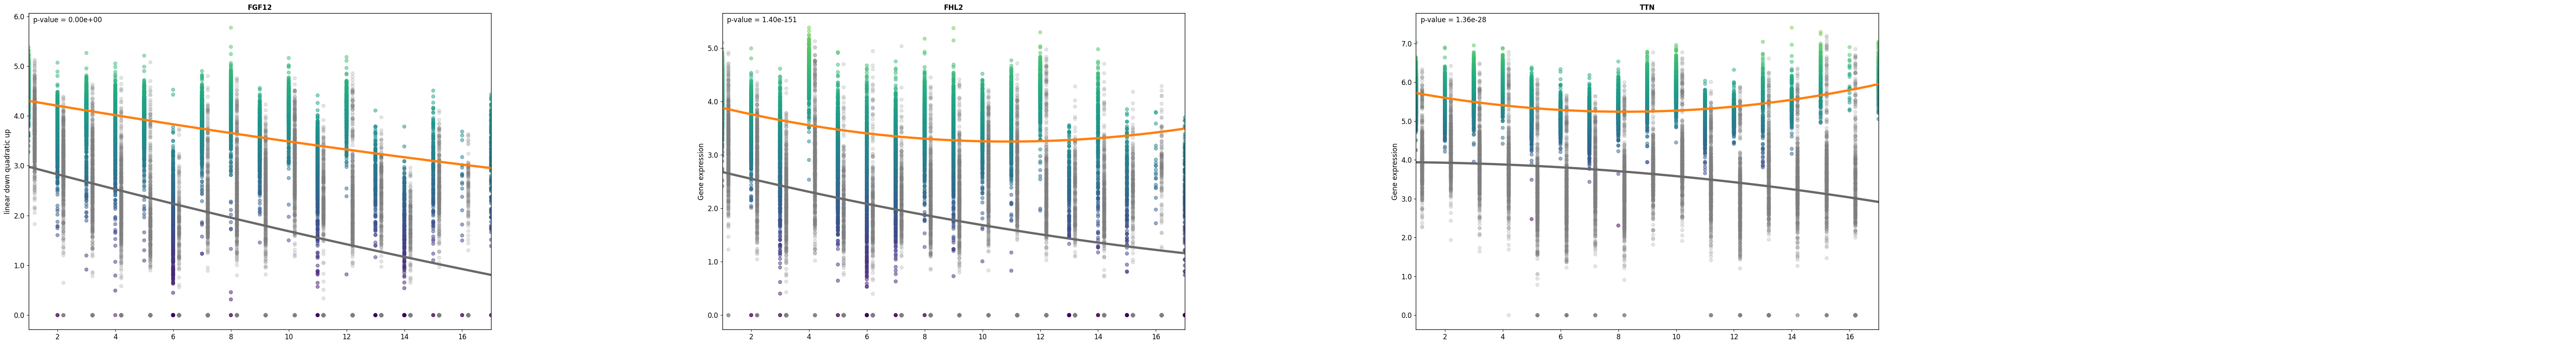

In [10]:
pl.tl.gene_cluster_differentiation(cellnames=['SPP1_Macrophages'],number_genes=1)